# Sombra de Agujeros Negros

El presente cuadernillo permite determinar el contorno de la sombra de agujeros negros estáticos, simétricamente esféricos, es decir, soluciones de agujeros negros que pueden ser escritos con la siguiente estructura métrica, 

\begin{equation}
ds^2 = -\frac{K(r)}{r^2}dt^2+\frac{r^2}{K(r)}dr^2+r^2d\theta^2+r^2\sin{(\theta)}^2d\phi^2.
\end{equation}

En partícular vamos a estudiar el caso de los agujeros negros de Schwarzschild y Reissner-Nordström, estas dos soluciones tienen la siguiente función métrica $K(r)$

\begin{eqnarray}
&& K(r) = r^2 - 2Mr,\quad\textit{Schwarzschild}.\\
&& K(r) = r^2 - 2Mr + q^2,\quad\textit{Reissner-Nordström}.
\end{eqnarray}

donde $M$ y $q$ son la masa y la carga eléctrica, respectivamente.

In [1]:
# Librerías
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Función Métrica
def K(r, M, q=0):
    if( q==0 ):
        # Schwarzschild
        return r**2 - 2*M*r
    else: 
        # Reissner-Nordström
        return r**2 - 2*M*r + q**2

# M es la masa
# q es la carga eléctrica.

# Derivada de la función Métrica
def dK(r, M):
    F = 2*r - 2*M
    return F

# Potencial Efectivo
def Veff(r, M, l, q=0):
    F = K(r, M, q ) * ( l**2 / r**4 )
    return F

# l Momento angular órbital

# Parámetro de Impacto 
def eta(r, M, q):
    F = r**2/np.sqrt(K(r, M, q))
    return F

# Contorno de la sombra
def Y(X, rc, M, q=0):
    if (rc == rcsch and q==0):
        return eta(rcsch, M, 0)**2 - X**2
    else:
        return eta(rcrn, M, q)**2 - X**2

El potencial potencial efectivo para el movimiento de los fotones en el plano ecuatorial de agujeros negros estáticos con simetría esférica está dado por

\begin{equation}
V_{eff}^{2}(r)=\frac{l^2}{r^4}K(r),
\end{equation}

donde $l$ es el momento angular orbital del fotón. La forma de este potencial se muestra en la siguiente gráfica:

In [3]:
# Parámetros físicos
M = 1.0
l = 4.0

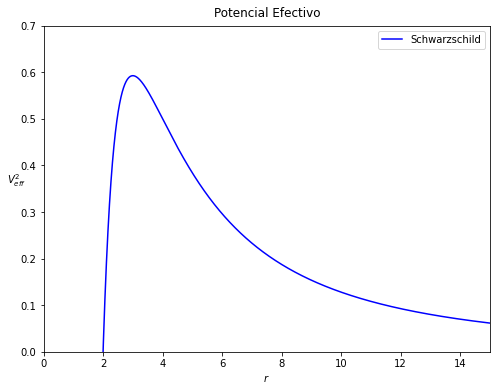

In [4]:
# Gráfica del Potencial
r = np.linspace( 0.0, 25, 100000 )
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot( r, Veff(r, M, l, 0) , color = 'blue', label = 'Schwarzschild')
#plt.plot( r, Veff(r, M, l, q), color = 'red', label = 'Reissner-Nordström' )
ax.set_xlim( 0.0, 15.0 )
ax.set_ylim( 0.0, 0.7 )
ax.set_xlabel('$r$')
ax.set_ylabel('$V^{2}_{eff}$', rotation=0)
ax.set_title("Potencial Efectivo", va='bottom')
plt.legend()
plt.show()

De la gráfica se observa la existencia de un punto máximo, estos puntos están relacionados con la existencia de órbitas circulares inestables, para fotones en este punto se localiza la foton-esfera. Para que un fotón se mantenga en estas órbitas se debe de cumplir las siguientes condiciones:

\begin{eqnarray}
&& \dot{r}=0\Rightarrow \mathcal{E}^{2}-V_{eff}^2(r_{c}) = 0,\quad\rightarrow\quad\eta^{2}_{c}=\frac{l^2}{\mathcal{E}^2}=\frac{r^4_{c}}{K(r_{c})},\quad\textit{Parámetro de Impacto.}\\
&& \ddot{r}=0\Rightarrow \frac{dV_{eff}^{2}(r_{c})}{dr}=0,\quad\textit{Posición del Máximo del Potencial.}
\end{eqnarray}

De la primera condición se obtiene el parámetro de impacto para fotones, mientras que de la segunda condición se determina la localización de la órbita circular inestable.

In [5]:
# Punto máximo del potencial 
def dV(r, M, l, q=0 ):
    if ( q==0 ):
        return -(4*l**2/r**5)*K(r, M, 0) + (l**2/r**4)*dK(r, M)
    else: 
        return -(4*l**2/r**5)*K(r, M, 0.45 ) + (l**2/r**4)*dK(r, M)

r0 = 2.0
rcsch = optimize.newton(dV, r0, args=(M, l, 0))
#rcrn = optimize.newton(dV, r0, args=(M, l, q))

Es necesario determinar las coordenadas celestiales, las cuales nos dará la proyección de la sombra del agujero negro en le cielo vista por un observador en el infinito, 

\begin{equation}
X=\lim_{r_{0}\rightarrow\infty}\left(-r_{0}^{2}\sin{(\theta_{0})}\left.\frac{d\phi}{dr}\right|_{\theta=\theta_{0}}\right),\qquad Y=\lim_{r_{0}\rightarrow\infty}\left(r_{0}^2\left.\frac{d\theta}{dr}\right|_{\theta=\theta_{0}}\right).
\end{equation}

Contorno de la sombra está dado por, 

\begin{equation}
X^2+Y^2=R_{s}^2=\eta_{c}^2.
\end{equation}

Observamos que para el caso de agujeros negros estáticos, simétricamente esféricos el radio de la sombra es igual al valor del parámetro de impacto en el radio de la foto-esfera. 

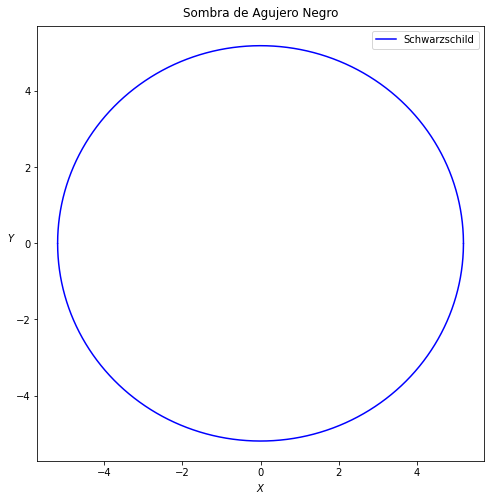

In [6]:
X = np.linspace( -2*np.pi, 2*np.pi, 1000000 )
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot( X , np.sqrt(Y(X, rcsch, M, 0)) , color = 'blue', label = 'Schwarzschild' )
plt.plot( X , -np.sqrt(Y(X, rcsch, M, 0)) , color = 'blue' )
#plt.plot( X , np.sqrt(Y(X, rcrn, M, q)) , color = 'red', label = 'Reissner-Nordström' )
#plt.plot( X , -np.sqrt(Y(X, rcrn, M, q)) , color = 'red' )
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$', rotation=0)
ax.set_title("Sombra de Agujero Negro", va='bottom')
plt.legend()
plt.show()